# Group Members:

<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Telmo Linacisoro
*   Paula Ceprián

# Guide

In this practice, we will cover the following topics:

* Gradient Descent and
* Image Denoising.

First, we will study the *gradient descent* algorithm, one of the
simplest (and more general) function minimization methods. We will consider a toy problem: the minimization of a function $f:\mathbb R^2\rightarrow \mathbb
R$. The second part of the practice is on the application of the gradient
descent method to remove the noise in an image, via the minimization of a
denoising energy.

\\

For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Pre-requisites:** Before the practice, you should review the following topics:

*   Gradient of a function $f:\mathbb R^n\rightarrow \mathbb R$.
*   Level sets (or level lines) of a function $f:\mathbb R^n\rightarrow \mathbb R$, and its geometrical relation to the gradient.
*   Directional derivatives, and how to compute them using the gradient.

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),

\\

**Submission instructions**

Register your group members [here](https://forms.gle/NLeYqhN6LyPnSPg78) if you haven't already.

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

  The evaluation is based on results, conclusions and the commented code together.



[comment]: <> (Macros:)
$\newcommand{\m}{-}
\newcommand{\ma}[1]{\boldsymbol{#1}}
\newcommand{\tras}[1]{#1^{\mathrm{T}}}
\newcommand{\herm}[1]{#1^{\mathrm{H}}}
\newcommand{\con}[1]{#1^{\mathrm{*}}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\tech}[1]{\overline{#1}}
\newcommand{\nspace}{\!\!\!\!}
\newcommand{\nmbr}[1]{\oldstylenums{#1}}
\newcommand{\eg}{\emph{e.g}. } \newcommand{\Eg}{\emph{E.g}. }
\newcommand{\ie}{\emph{i.e}. } \newcommand{\Ie}{\emph{I.e}. }
\newcommand{\cf}{\emph{c.f}. } \newcommand{\Cf}{\emph{C.f}. }
\newcommand{\etc}{\emph{etc}. } \newcommand{\vs}{\emph{vs}. }
\newcommand{\wrt}{w.r.t\onedot } \newcommand{\dof}{d.o.f. }
\newcommand{\etal}{\emph{et al}. }
\newcommand{\R}{\mathbb{R}}
\newcommand{\sign}{\mathrm{sign}}
\newcommand{\eps}{\varepsilon}
\newcommand{\To}{\longrightarrow}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}$

# Part 1: Gradient Descent

In [ ]:
# import required libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython import display


## Minimization of a toy function

We will use the gradient descent method to compute the minima of the function
$f:\mathbb R^2\rightarrow \mathbb R$ given by,

$$f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)$$

<font color='blue'>**(QUESTION 1.1)**  Complete the Python functions **toy_fun** and **toy_gradient**. These functions implement the function $f$ and its gradient. Follow the comments provided in the code.

In [ ]:
def toy_fun(x: np.ndarray):
    """
    Polynomial toy function - see the guide

    :param x: array [x_1, x_2]

    :return y: value of the function at point x
    """
    # TODO: Compute the function
    y = 1/1000*(np.power(x[0],4)+np.power(x[1],4)-80*np.power(x[0],2)-60*np.power(x[1],2)+100*x[0]+50*x[1]+1) ### WRITE YOUR SOLUTION
    return y

In [ ]:
toy_fun(np.array([100,2]))

In [ ]:
def toy_gradient(x: np.ndarray):
    """
    Gradient of toy_fun polynomial toy function

    :param x: 2x1 array
    :return grad: 2x1 array: gradient of the toy function at point x
    """
    # Compute the gradient of the toy function (must be calculated by hand)
    grad = np.array([(4*np.power(x[0], 3) - 160*x[0] + 100)/1000, (4*np.power(x[1], 3) - 120*x[1] + 50)/1000])
    return grad


In [ ]:
x = np.array([[1,2]]).T
toy_gradient(x)

<font color='blue'>**(QUESTION 1.2)** Complete the Python function **gradient_descent**.
This function implements a gradient descent algorithm. We are going to
implement it in a way in which we can use the same gradient descent function
for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.

In [ ]:
def gradient_descent(callback,
                     callback_params: dict,
                     initial_condition: np.ndarray,
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: gradient of function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and
                            its gradient. Useful for the image denoising task.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    iterates = []

    # Main loop for Gradient Descent
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run a gradient descent step. Allow solution to work with additional input.
        gf = callback(current_value, **callback_params) ### WRITE YOUR SOLUTION

        # TODO: Update the current value and norm value of gradient
        current_value = previous_value - step_size*gf ### WRITE YOUR SOLUTION
        current_norm_value = np.linalg.norm(gf) ### WRITE YOUR SOLUTION
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))

        # Plot current position! Just for visualization purposes
        # if x is a 2x1 vector (visualization of toy example)
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[1, 0], current_value[0, 0], marker = 'o', color = "k")
            ax.plot([previous_value[1, 0], current_value[1, 0]],
                    [previous_value[0, 0], current_value[0, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)

        # Update the iteration
        current_iteration += 1
        # Collect iterates
        iterates.append(current_value.copy())

    return current_value, iterates

<font color='blue'>**(QUESTION 1.3a)**   Run the function **toy_main** with several time steps and several initial conditions. What do you observe?

In [ ]:
def toy_main(initial_condition: np.ndarray,
             step_size: float,
             max_iterations: int):
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    #plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z,
                    corner_mask = False, levels = 150,
                    linewidths=(1,), cmap = cm.coolwarm)

    # Set initial condition --> TRY CHANGING IT
    #x0 =  np.array([[-4], [-2]])
    x0 = initial_condition


    # Set additional gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    tolerance = 0.01
    #step_size = 2
    #max_iterations = 150

    # Call gradient descent minimization
    print("First gradient descent ...")
    xs = gradient_descent(callback = toy_gradient,
                          callback_params = {},
                          initial_condition = x0,
                          step_size = step_size,
                          max_iterations = max_iterations,
                          tolerance = tolerance,
                          fig = fig_contours,
                          ax = ax_contours)
    return xs

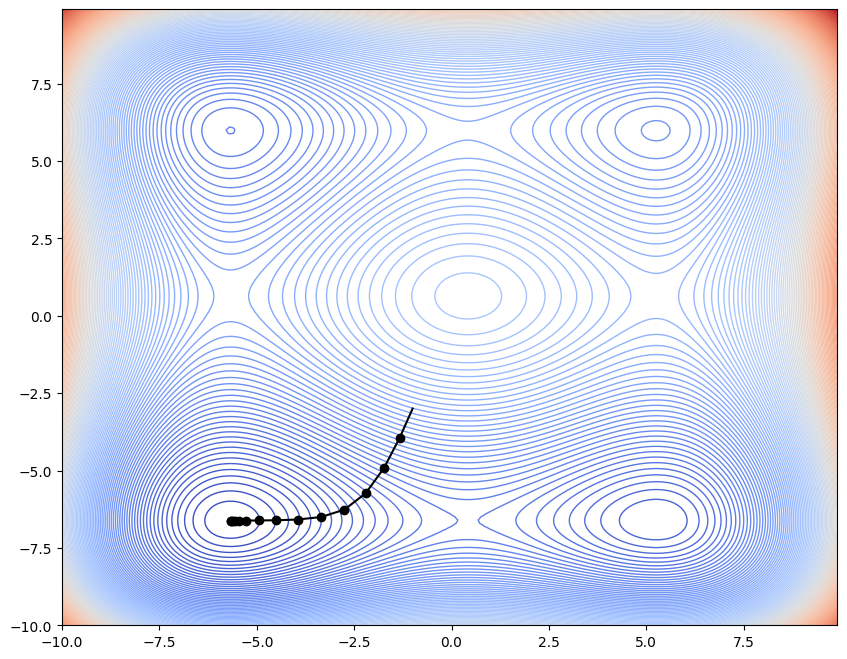

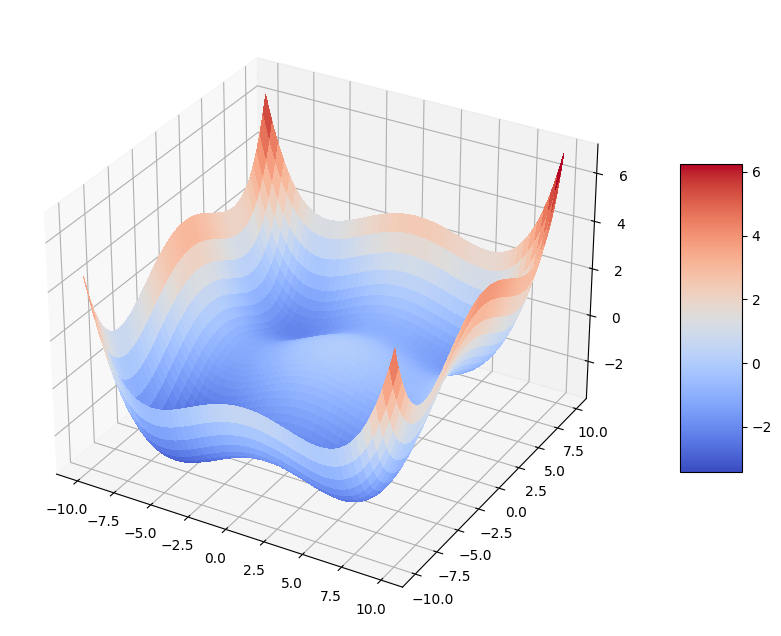

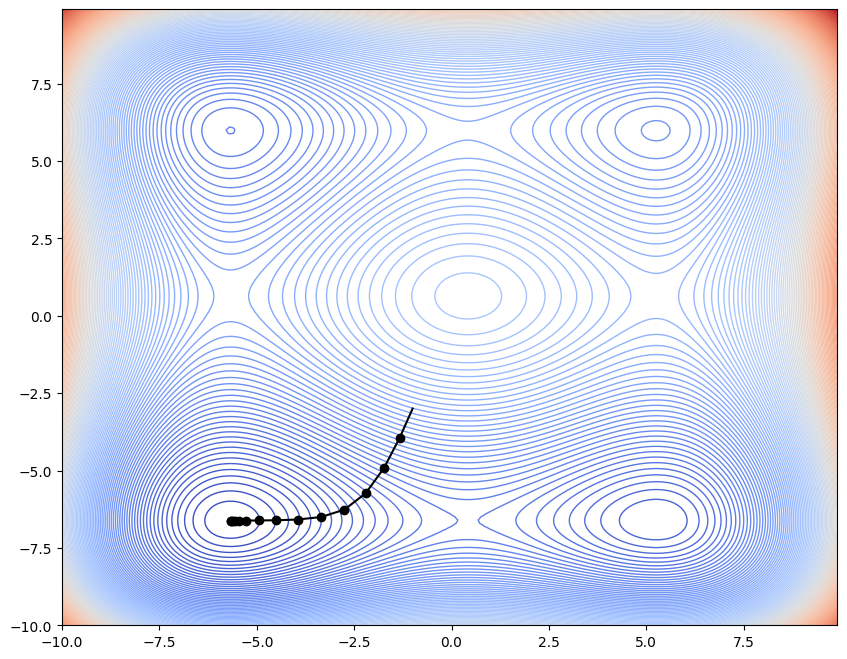

In [ ]:
init_condition = np.array([[-3], [-1]])
step_size_ = 2
max_iters = 150

xs_ = toy_main(init_condition,
                step_size_,
                max_iters)

<font color='red'>**ANSWER:**

<font color='red'> The function we're using is a quadratic polynomial function with two variables. By looking at the plot in 3D we can see that there are 4 valleys where we could potentially find the global minima and which are guaranteed to be a local minima around a neighborhood.

<font color='red'> Moreover, the level lines corroborate that there are 4 regions on interest which we could try to explore. The parameters that we pass to the function are the starting point, the step size and the maximum number of iterations. By changing this parameters we can observe a completely different behaviour. For instance if we start at coordinates (3, -1) we end up reaching the top-left part of the plot, on the other hand if we start at coordinates (-3, -1) we end up on the bottom-left. So, the behavior of the function as we move through its landscape depends on where we start and how the function behaves around those starting points.

<font color='blue'>**(QUESTION 1.3b)** Look at the plots returned by **toy_main**. How many local minima does the function have in the domain	$[-10,10]\times [-10,10]$?


<font color='red'>**ANSWER:**

<font color='red'> In total we can find 4 local minima at approximate coordinates (6, -6), (-6, -6), (6, 6) and (-6, 6).

<font color='blue'>**(QUESTION 1.3c)** Run **toy_main** starting from $x^0 = [-2,-8]$. Does it converge to the global minimum?


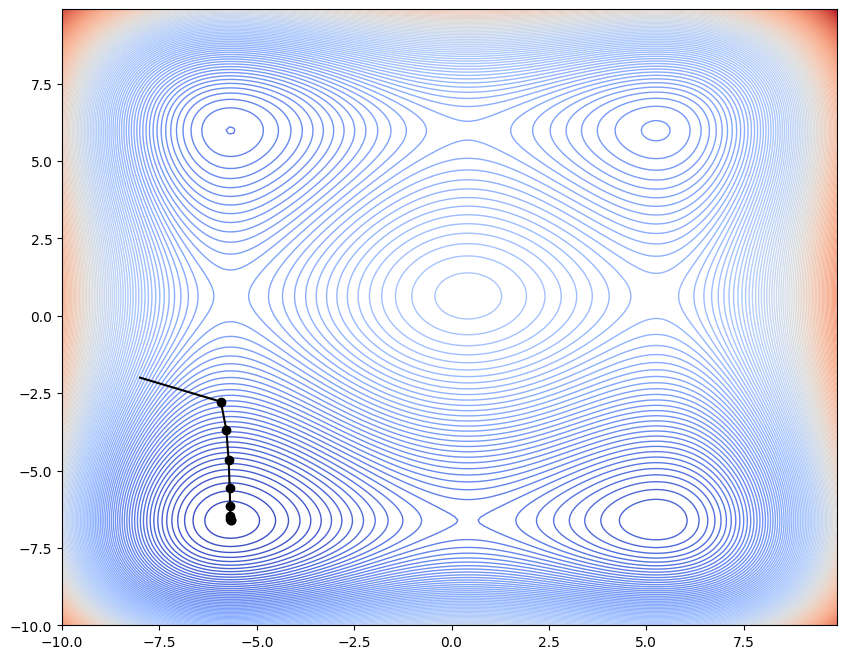

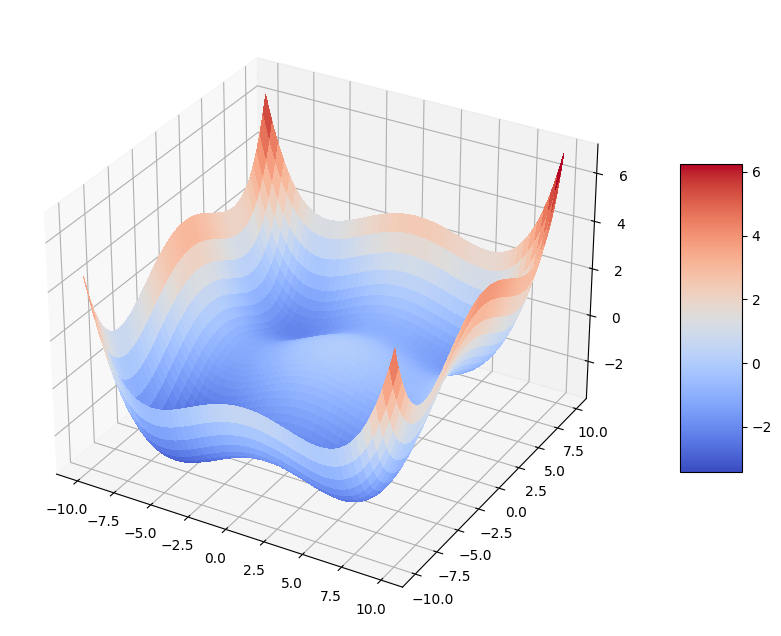

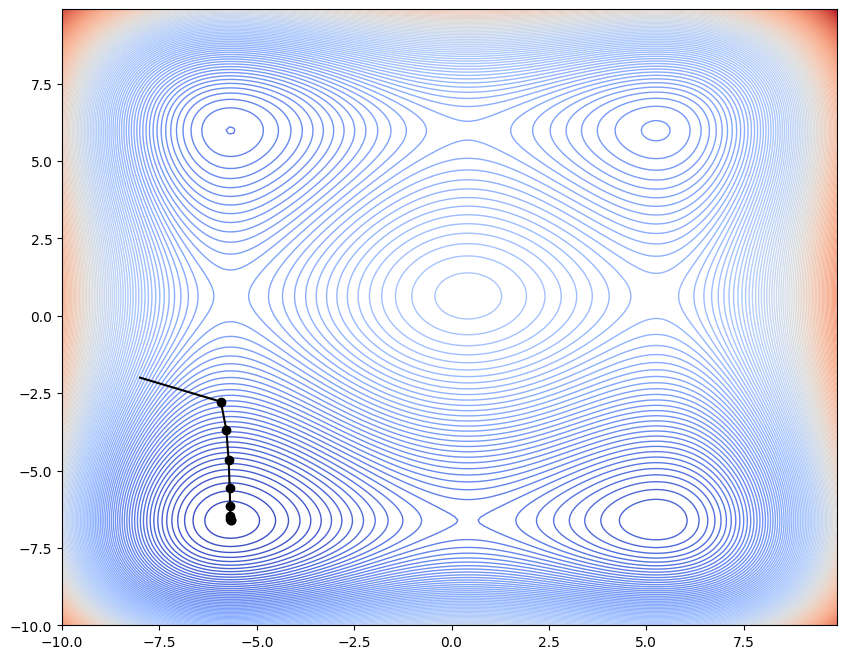

In [ ]:
# TODO: Set initial condition and run toy_main again
init_condition = np.array([[-2], [-8]])
step_size_ = 2
max_iters = 150

xs_ = toy_main(init_condition,
                step_size_,
                max_iters)

<font color='red'>**ANSWER** Yes, indeed we end up at (-6, -6) which is the global minimum.

<font color='blue'>**(QUESTION 1.3d)** Plot the log error. Hint: refer to slides on "Convergence rate of iterative methods" from the theory lectures.

In [ ]:
# TODO: Get the global minima
def get_global_minima():
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun and find minimum y value then get corresponding x1, x2
    min = 99999
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])
            if y[i, j] < min:
              x1_min = x1_value
              x2_min = x2_value
              min = y[i, j]
    y_min = toy_fun([x1_min, x2_min])
    return x1_min, x2_min, y_min

In [ ]:
# TODO: Compute the log error using the output from toy_main (we used the toy_main in the function above)
x1_min, x2_min, y_min = get_global_minima()
values = [toy_fun(iterate) for iterate in xs_[1]]
# We used the log of the absolute error
log_error = [np.log(np.abs(value - y_min)) for value in values]

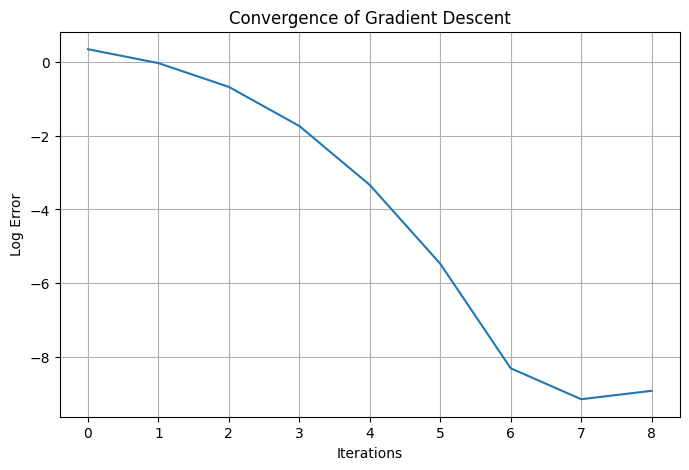

In [ ]:
# TODO: Plot log error against the number of time steps
plt.figure(figsize=(8, 5))
plt.plot(range(len(log_error)), log_error)
plt.xlabel('Iterations')
plt.ylabel('Log Error')
plt.title('Convergence of Gradient Descent')
plt.grid(True)
plt.show()

<font color='blue'>**(QUESTION 1.3e)** Estimate the rate of convergence from the logarithmic plot you have created.

<font color='red'>**ANSWER:**

<font color='red'> From the slides we know that we can say that this method has linear convergence (also Q-linear or order one convergence) if:

<font color='red'> $$\lim_{{k \to \infty}} \left( \frac{{\| x_{k+1} - x^* \|}}{{\| x_k - x^* \|}} \right) = r, \quad\text{with } r \in (0, 1)$$

<font color='red'> Where $r$ is the convergence rate.
If $r = 0$, we say that the method has superlinear convergence rate. If $r = 1$, it
has sublinear convergence rate.

<font color='red'> We can relate the log error with the convergance rate in the sense that one is the mirrored plot of the other along the x axis. That is, if the error has a slope of -1 we could say that it is linear, if it's concave-downword it is superlinear, and lastly if concave-upword it is sublinear. As the slope of the log error is concave downwords the **convergance rate is superlinear**.

<font color='blue'>**(QUESTION 1.3f)** Try **toy_main** with different step sizes. Which step sizes yield a faster convergence?	Which are more accurate?

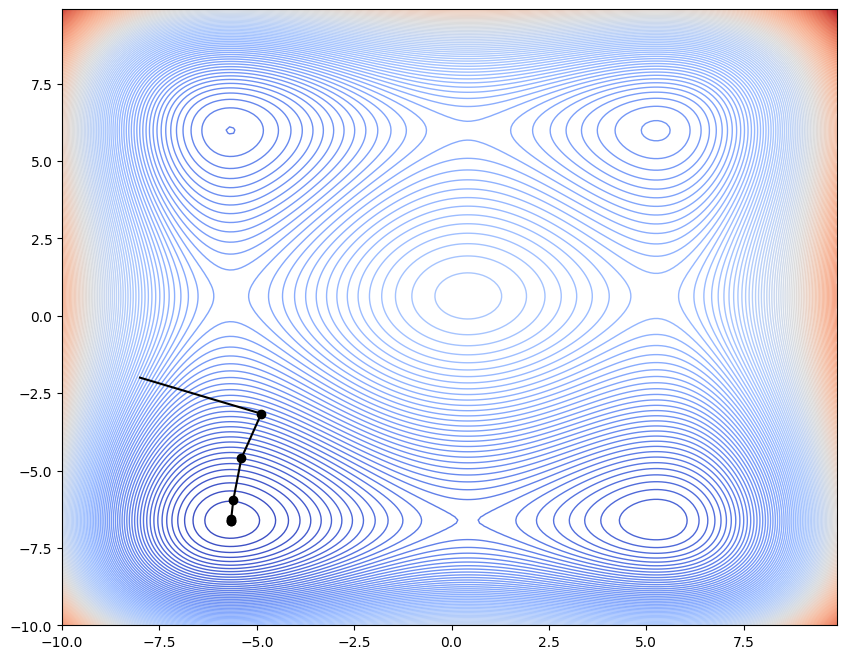

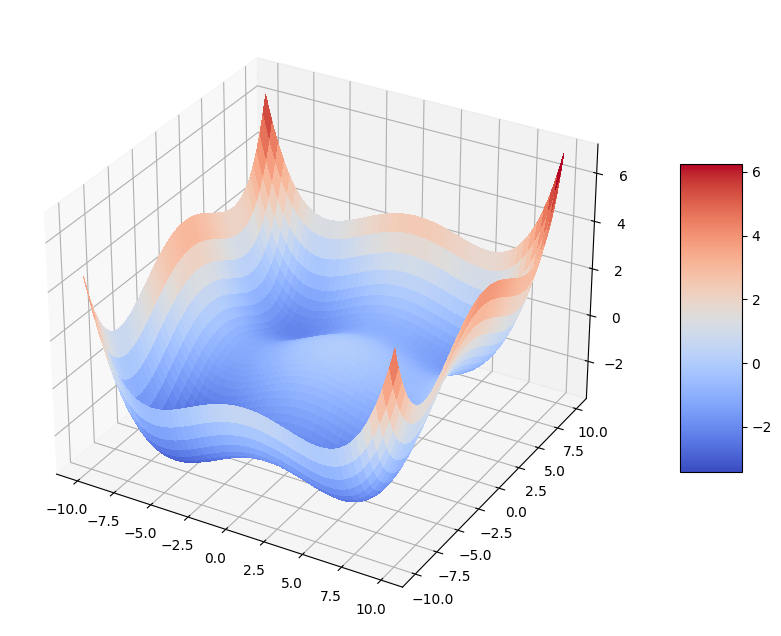

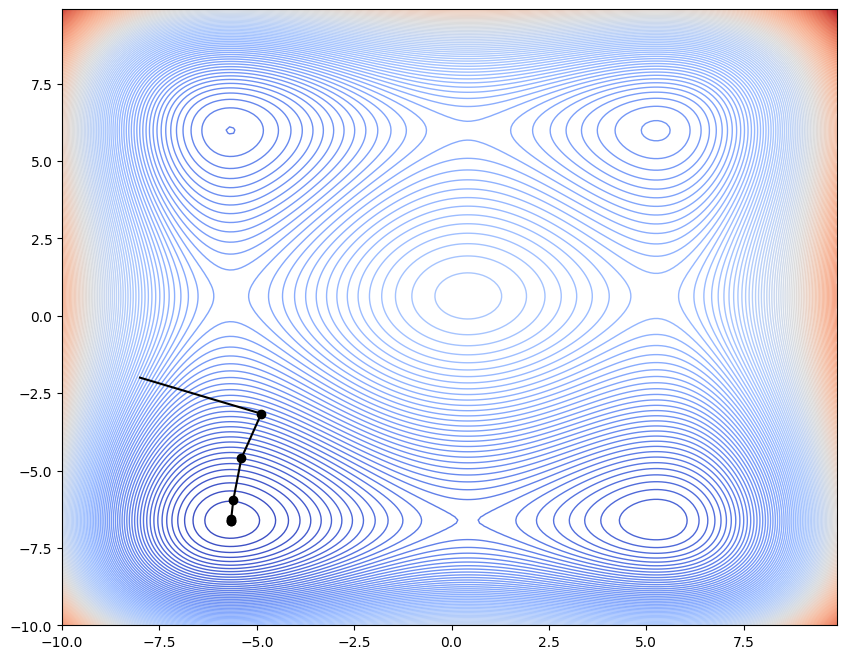

In [ ]:
# TODO: Run toy_main with different step sizes
init_condition = np.array([[-2], [-8]])
step_size = 3
max_iters = 150

ex13f = toy_main(init_condition,
                step_size,
                max_iters)

<font color='red'>**ANSWER:** For evaluating toy_main convergence, we have used init_conditions = np.array([[-2], [-8]]), max_iters = 200 and a tolerance = 0.01, and tried different step_sizes. After trying some values, with an step size of 3 we achieve a faster and accurate convergence than with an step_size of, for example, 1 or 10.

<font color='red'> Normally, smaller step sizes lead to slower but more accurate convergence, as gradient descent needs to perform more iterations (as well as it depends on other parameters such as the properties of the optimized function). On the other hand, larger step sizes may converge faster but they have the risk of never converging because they overshoot the optimal point every time.

<font color='red'>In summary, regarding accuracy, smaller step sizes perform better than larger ones, while a faster convergence is achieved with larger step sizes. Therefore, we need to find the equilibrium between fast convergence and accuracy to lead to optimal results.

# Part 2: Image denoising energy

## Discrete images

We consider two types of images:
*Scalar images* and *vector-valued images*.  A scalar image represents an image
with one channel, typically a gray-scale image. Vector-valued images are images
which for each pixel has a vector. It could be for example an RGB image: at
each pixel, we have a 3-dimensional vector with the R, G and B components.
As we are going to see next, although we will not work with color images, we
still need vector valued images for gradient images.

### Scalar images

We define a scalar discrete image as a real function
$u:\Omega\rightarrow \mathbb R$  defined over the rectangular discrete lattice
$\Omega = \{1,\dots,M\}\times\{1,\dots,N\}$ ($N$ columns and $M$ rows). We
refer to the image value at location $(i,j)\in\Omega$ (row $i$, column $j$) as
$u_{i,j}$ or $u_{ij}$. The following for example is an image defined on $\Omega
= \{1,2,3,4\}\times \{1,2,3,4,5\}$.

\

$$
u = \left[
\begin{array}{c c c c c c c}
	u_{11} & u_{12} & u_{13} & u_{14} & u_{15} \\
	u_{21} & u_{22} & u_{23} & u_{24} & u_{25} \\
	u_{31} & u_{32} & u_{33} & u_{34} & u_{35} \\
	u_{41} & u_{42} & u_{43} & u_{44} & u_{45} \\
\end{array}
\right]
$$

\

We will consider the image as a vector in  $\mathbb R^{MN}$, by concatenating
the columns in a huge (column) vector:

\

$$u = [\overbrace{u_{11}, \dots, u_{M1}}^{\text{column 1}},
\overbrace{u_{12}, \dots, u_{M2}}^{\text{column 2}},
\quad\cdots\quad,\overbrace{u_{1N},\dots, u_{MN} }^{\text{column N}}]^T.$$

\

We define the notation $\mathcal X = \mathbb R^{MN}.$ We can think of $\mathcal X$ is the space of
all $M\times N$ images. Since we consider images as vectors in $\mathcal X$, we have a
scalar product and a corresponding norm given as follows:


$$\left\langle u,v \right\rangle_\mathcal X = \sum_{i = 1}^M\sum_{j = 1}^N
u_{ij}v_{ij}\quad\text{and}\quad \|u\|_{\mathcal X} = \sqrt{\langle u,u
\rangle_\mathcal X} = \sqrt{ \sum_{i = 1}^M\sum_{j = 1}^N u_{ij}^2},$$

where $u,v\in\mathcal X$ are two images. In some cases we will call these the
$\mathcal X$-scalar product and the $\mathcal X$-norm.

<font color= "red">**Hint**: *Notice in Python the difference between matrix multiplication and element-wise multiplication when working with* "np.ndarray".

### Vector images

We will arrange vector-valued images into a vector in $\mathbb R^{2MN}$ by
"vectorizing" first the first component followed by the second:

\

\begin{multline*}
g = [\overbrace{g_{1,11}, \dots, g_{1,N1}}^{\text{col. 1 of comp.
1}},\quad\cdots\quad \overbrace{g_{1,1M}, \dots, g_{1,NM}}^{\text{col. M
of comp. 1}},\\\overbrace{g_{2,11}, \dots, g_{2,N1}}^{\text{col. 1 of comp.
2}},\quad\cdots\quad \overbrace{g_{2,1M}, \dots, g_{2,NM}}^{\text{col. M
of comp. 2}}]^T\in\mathcal Y = \mathbb R^{2MN}.
\end{multline*}

\

The space of all $M\times N$ vector-valued images (with two-component vectors) will be denoted by $\mathcal Y = \mathbb
R^{2MN}.$ Note that we have to be careful to avoid confusions: the value of a vector-valued image $g$ at pixel $(i,j)$, $g_{ij}$, is a vector in $\mathbb R^2$. On the other hand $g$ itself is a vector in $\mathcal Y = \mathbb R^{2MN}$. Therefore we will use different notations for the scalar product and the norm in $\mathbb R^2$ and in $\mathcal Y$.

For vectors in $a = (a_1,a_2), b = (b_1,b_2)\in\mathbb R^2$ we use the
following notations:

$$a\cdot b = a_1b_1 + a_2b_2\quad \text{ and }\quad
|a| = \sqrt{a\cdot a} = \sqrt{a_1^2 + a_2^2}.$$

On the other hand, for two vector-valued images $g,h$ in $\mathcal Y$, we
will use the following $\mathcal Y$-scalar product and $\mathcal Y$-norm, which is defined based the
scalar product in $\mathbb R^2$:

$$
\left\langle g,h \right\rangle_\mathcal Y = \sum_{i = 1}^M\sum_{j = 1}^N
	g_{ij}\cdot h_{ij}.
$$

## The discrete gradient as a matrix

Since we are working with discrete images, we will consider a discrete
approximation of the gradient, using *forward differences*. We will use
the notation $\nabla^+ u$ to refer to the image forward gradient. The discrete
gradient of $u$ is a vector-valued image, $\nabla^+u:\Omega\rightarrow \mathbb R^2$. It has two components for the horizontal and
vertical partial derivatives.
Thus we have that

$$\nabla^+ u_{ij} =
\left(
	\nabla^+_i u_{ij},
	\nabla^+_j u_{ij}
\right)\in \mathbb R^2.$$

Here $\nabla^+_i$ and $\nabla^+_j$ refer to the forward differences partial
derivatives in the direction of $i$ (rows) and $j$ (columns). These are defined as follows:

$$\nabla^+_i u_{ij} = \left\{
\begin{array}{l l}
	u_{i+1,j} - u_{i,j} & \text{ if } i < M\\
	0 & \text{ if } i = M
\end{array}
\right.\quad\quad
\nabla^+_j u_{ij} = \left\{
\begin{array}{l l}
	u_{i,j+1} - u_{i,j} & \text{ if } j < N\\
	0 & \text{ if } j = N
\end{array}
\right.$$

The $i$ derivative corresponds to the vertical derivative, whereas
the $j$ derivative to the horizontal derivative.

We can consider $\nabla^+_i$ and $\nabla^+_j$ as square matrices of $MN$ rows
and columns. We can "derivate" the image by computing the product of
$\nabla^+_i$ by our vector representation of the image. The result is a vector
representation of the $i$ partial derivative.

<font color='blue'>**(QUESTION 2.1a)** Complete the Python function "im_fwd_gradient". This function computes the forward gradient
$\nabla^+$. Follow the comments provided in the code.

In [ ]:
def im_fwd_gradient(image: np.ndarray):
    """
    Discrete gradient of an image using forward differences, with
    homogeneous Neuman boundary conditions.

    :param image: an MxN image

    :return grad_i: partial derivative in the i direction (vertical)
    :return grad_j: partial derivative in the j direction (horizontal)
    """
    # TODO: Get the size of the image
    image_shape = image.shape ### WRITE YOUR SOLUTION

    # TODO: Calculate both gradients
    #       Check the Neuman boundary conditions

    # We will use np.diff function, that computes the difference between consecutive pixels along the specified axis
    #consecutive rows: if i<M -> u(i+1,j)-u(i,j)
    grad_i = np.diff(image,1,0)
    #row of zeros to the bottom of the grad_i: if i=M -> 0;
    grad_i = np.append(grad_i, np.zeros((1,image_shape[1])), axis=0)

    #consecutive columns: if j<N -> u(i,j+1)-u(i,j)
    grad_j = np.diff(image,1,1)
    #column of zeros to the right of the grad_j: if j=N -> 0
    grad_j = np.append(grad_j, np.zeros((image_shape[0],1)), axis=1)

    return grad_i, grad_j

In [ ]:
u = np.array([[1,2,0],[-1,4,3],[3,-5,1]])
print(f"u = \n{u}")

u = 
[[ 1  2  0]
 [-1  4  3]
 [ 3 -5  1]]


In [ ]:
gradu_i,gradu_j = im_fwd_gradient(u)
print(f"forward row gradient: \n{gradu_i},\n\nforward column gradient: \n{gradu_j}")

forward row gradient: 
[[-2.  2.  3.]
 [ 4. -9. -2.]
 [ 0.  0.  0.]],

forward column gradient: 
[[ 1. -2.  0.]
 [ 5. -1.  0.]
 [-8.  6.  0.]]


In [ ]:
check_gradu_i = np.allclose(gradu_i,np.array([[-2.,  2.,  3.],[ 4., -9., -2.],[ 0.,  0.,  0.]]))
check_gradu_j = np.allclose(gradu_j,np.array([[ 1., -2.,  0.], [ 5., -1.,  0.], [-8.,  6.,  0.]]))

print("Is implementation of 'im_fwd_gradient' correct? {}".format(check_gradu_i and check_gradu_j))

Is implementation of 'im_fwd_gradient' correct? True


<font color='blue'>**(QUESTION 2.1b)** Complete the Python function "im_bwd_divergence". This function computes the backward divergence $div^{-}$. Follow the comments provided in the code.

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) =
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [ ]:
def im_bwd_divergence(vector_image_i: np.ndarray,
                      vector_image_j: np.ndarray):
    """
    Discrete divergence of a vector image using backward differences.
    This is the negative transpose of the im_fwd_gradient

    :param vector_image_i: MxN image of vertical vector components
    :param vector_image_j: MxN image of horizontal vector components

    :return divg: backwards divergence of vector_image
    """
    # Initialize the divergence array with zeros
    divg = np.zeros_like(vector_image_i)

    # Compute backward differences for the i component
    divg1 = np.diff(vector_image_i, axis=0)
    # Pad the first row of the result with the first row of vector_image_i
    divg1 = np.vstack((vector_image_i[0], divg1))

    # Compute backward differences for the j component
    divg2 = np.diff(vector_image_j, axis=1)
    # Pad the first column of the result with the first column of vector_image_j
    divg2 = np.hstack((vector_image_j[:, 0][:, np.newaxis], divg2))

    # Combine the backward differences for both components to compute the divergence
    divg = divg1 + divg2

    return divg

In [ ]:
divg_ = im_bwd_divergence(gradu_i,gradu_j)
print(f"backward divergence: \n{divg_}")

backward divergence: 
[[ -1.  -1.   5.]
 [ 11. -17.  -4.]
 [-12.  23.  -4.]]


In [ ]:
check_divg = np.allclose(divg_,np.array([[ -1.,  -1.,   5.], [ 11., -17.,  -4.], [-12.,  23.,  -4.]]))

print("Is implementation of 'im_bwd_divergence' correct? {}".format(check_divg))

Is implementation of 'im_bwd_divergence' correct? True


## An energy for image denoising

We now have all the ingredients to formulate our image denoising energy. Let us consider a noisy
image $f:\Omega\rightarrow \mathbb R$. We assume that the image $f$ is the result of contaminating a
clean image $u^*$ by white Gaussian noise:

$$f_{ij} = u^*_{ij} + n_{ij}, \quad\text{ for } 1\leqslant i\leqslant M, 1\leqslant j\leqslant N,$$

where $n_{ij}\sim \mathcal N(0,\sigma)$.

To denoise the image, we consider a model for noiseless images (the image
\emph{prior}). There are many possibilities. In this practice we will assume
that noiseless images have gradients with low norm. This is one of the
simplest models. The image prior represents what we know about the image, *before knowing the actual image*.

We will estimate $u^*$ by computing
the minimum of the following energy $E:\mathbb R^{MN}\rightarrow \mathbb R$:

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N
	c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +
	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

where $c:\Omega\rightarrow [0,1]$ is a coefficients image which controls the
regularization. Recall that $|\cdot|$ denotes the 2-norm in $\mathbb
R^2$:

$$|\nabla^+u_{ij}|^2 = \left(\nabla^+_iu_{ij}\right)^2 +
\left(\nabla^+_ju_{ij}\right)^2.$$

Now we can define our energy for image denoising as follows:

\

\begin{eqnarray}
	E(u) = \langle C \nabla^+ u, \nabla^+ u\rangle_{\mathcal Y} + \beta \|u
	- f\|_{\mathcal X}^2.
\end{eqnarray}

\

Here $C$ is a $2MN\times 2MN$ diagonal matrix defined as follows:

$$C = \left[
\begin{array}{c:c}
	\text{diag}(c) &\\\hdashline
	& \text{diag}(c)
\end{array}
\right],$$

which in its diagonal has two copies of the vectorized image $c$. One copy
performs the element-wise multiplication of $c$ with the $i$ partial
derivative and the other with the $j$ partial derivative.

<font color='blue'>**(QUESTION 2.2a)** Complete the Python function "denoise_energy" following the comments provided in the
code.

In [ ]:
def denoise_energy(image: np.ndarray,
                   noise: np.ndarray,
                   coefficients: np.ndarray,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """

    # Calculate the gradient
    gu_i = np.diff(image, axis=0)  # Vertical gradient
    gu_i = np.vstack((gu_i, np.zeros_like(gu_i[0])))  # Pad with zeros to match shape of image
    gu_j = np.diff(image, axis=1)  # Horizontal gradient
    gu_j = np.hstack((gu_j, np.zeros_like(gu_j[:, [0]])))  # Pad with zeros to match shape of image

    # Calculate the regularization term
    reg_term = np.sum(coefficients * (gu_i**2 + gu_j**2))

    # Calculate the data attachment term
    attach_term = np.sum((image - noise)**2)

    # Putting everything together
    energy = reg_term + beta * attach_term

    return energy


In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
res = denoise_energy(image_real,
                    image_noisy,
                    np.ones_like(image_noisy),
                    .05)

In [ ]:
print("Is implementation of 'denoise_energy' correct? {}".format(res == 92.25))

Is implementation of 'denoise_energy' correct? True


<font color='blue'>**(QUESTION 2.2b)** Compute the gradient of the denoise energy function
$E(u) = \langle C \nabla^+ u, \nabla^+ u\rangle_{\mathcal Y} + \beta \|u	- f\|_{\mathcal X}^2$.

<font color='red'>**ANSWER:**

<font color='red'>The gradient of the denoise energy function $E(u)$ with respect to $u$ is: $\nabla E(u) = 2C(\nabla^{+} u)^2 + 2C(\nabla^{+} u)^2 + 2\beta(u - f)$

<font color='blue'>**(QUESTION 2.2c)** Complete the Python function "denoise_energy_gradient" following the comments provided in the
code.

In [ ]:
def denoise_energy_gradient(image: np.ndarray,
                            noise: np.ndarray,
                            coefficients: np.ndarray,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u
    """
    # Calculate the gradient
    gu_i, gu_j = im_fwd_gradient(image)

    # Calculate the gradient of regularization term
    grad_reg_term = -2*(im_bwd_divergence(coefficients*gu_i, coefficients*gu_j))

    # Calculate the gradient of data attachment term
    grad_attach_term =  2*(image - noise)

    # Putting everything together
    grade = grad_reg_term + beta*grad_attach_term

    return grade

In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
grade_ = denoise_energy_gradient(image_real,
               image_noisy,
               np.ones_like(image_noisy),
               .05)

In [ ]:
check_grade = np.allclose(grade_,np.array([[-10.5,  -8.5,  -6.5], [ -0.5,   1.5,   3.5], [  3.5,   5.5,   7.5]]))

print("Is implementation of 'denoise_energy_gradient' correct? {}".format(check_grade))

Is implementation of 'denoise_energy_gradient' correct? True


## Example with a noisy image

First we need some helper files:

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Move to your drive
%cd /content/drive/MyDrive/

In [ ]:
# Clone repo with auxilary files required for this and the following labs.
# This needs to be done only once for the course.
# If there is an error, then you attended the first lab! :)
!git clone https://github.com/Muchay/OptTechCourse_Aux.git

In [ ]:
# Create source path
source = "/content/drive/MyDrive/OptTechCourse_Aux/Lab2/"

Next, we create a noisy image and attempt to denoise it.

**Load the image**

In [ ]:
images_dir = os.path.abspath(source+"images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

In [ ]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy data")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [ ]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),    # --> CHANGE THIS AND COMPARE
    "beta": .01                                   # --> CHANGE THIS AND COMPARE
}
step_size = .01                                   # --> CHANGE THIS AND COMPARE
max_iterations = 100                              # --> CHANGE THIS AND COMPARE
tolerance = .1                                    # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd, _ = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params,
                            initial_condition = image_noisy,
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance)

**Show the results**

In [ ]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy data")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

In [ ]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

In [ ]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')

<font color='blue'>**(QUESTION 2.3a)** Run the example with different
parameters (for instance, changing the maximum number of iterations, $c$, $\beta$,etc. Can you explain what you observe?

<font color='red'>**ANSWER** After running the example changing the different parameter values, we can conclude some facts:

<font color='red'> -- **Beta**: it determines the weight of the attachment term in the denoising function. Increasing it reduces the weight of regularization, and we get smoother images. Decreasing it results in more detailed images, but noisier denoised images. For example, with beta=0.99 we get a very sharp image, whereas for beta=0.01 we get it very smooth.

<font color='red'> -- **C**: it determines the weight of the regularization term in denoising. On the one hand, higher C's result in smoother images.On the other hand, lower C's result in weaker regularization, giving more details to the images, but also some letting noise to not disappear.

<font color='red'> -- **Max number of iterations**: this parameter is very intuituve. A big max number of iterations permits the algorithm to run for longer. Oppositely, a low number does the algorithm finish earlier. Also, with a higher max_iterations value, we improve the denoising performance, although the cost will be also higher.

<font color='red'> -- **Tolerance**: a smaller value means the algorithm stops when the norm of the gradient is close to zero. A larger value allows the algorithm to stop sooner, and therefore to accept a less precise solution. Hence, for an image as precise as possible, is better to use lower values of tolerance. For example, with tolerance=0.1 we will get a more precise solution (but slower) than with tolerance=0.9, which will convergence faster but won't be that precise.

<font color='red'> -- **Step size**: as explained in other parts of this Lab, this parameter may do the algorithm to overshoot the minimum, leading to oscillations or divergence with a larger value. Contrarly, a smaller value can result in slower convergence but is less likely to overshoot the mentioned minimun.

<font color='blue'>**(QUESTION 2.3b)** What are the effects of changing $c$?

<font color='red'>**ANSWER** Continuing with the answer of the previous question, changing the coefficients parameter ($c$) in the context of denoising (using gradient descent) **affects the regularization term of the denoising energy function** that we have seen also previously in the lab. $C$ controls de weight or strength of regularization, which influences the **smoothness** of the denoised image.

<font color='red'> **Higher $c$** values means that we have a stronger regularization, which leads to smoother images and prioritizes noise reduction over preserving details in the image.

<font color='red'> **Lower $c$** values, instead, weaken the regularization, resulting in sharper but noisier denoised images and preserving details on them, allowing some noise to remain.

<font color='red'> In summary, with $c$ we can change the smoothness of the denoised image and the balance between noise reduction and details.


<font color='blue'>**(QUESTION 2.3c)** Try to find the parameters gives you a smaller Mean Square Error. You can use the Python function $mse$.

In [ ]:
from sklearn.metrics import mean_squared_error

image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
image_noisy = image_real + np.random.uniform(high=50, size=image_real.shape)

# Here we define the parameter values we can change to compare different MSE values
c_values = np.arange(0.001, 0.1, 0.5)    # Values for coefficients between 0 and 1
b_values = np.arange(0.001, 0.1, 0.5)    # Values for beta between 0 and 1
ss_values = [1, 3.5, 2]                  # Values for step_size
max_it_values = [100, 200]               # Values for max_iterations
t_values = [0.1, 0.01]                   # Values for tolerance

best_mse = float('inf')
best_parameters = None
mse_parameter_values = []

#We iterate through all the different parameter combinations
for coefficient in c_values:
    for beta in b_values:
        for step_size in ss_values:
            for max_iterations in max_it_values:
                for tolerance in t_values:
                    callback_params = {
                        "noise": image_noisy,
                        "coefficients": coefficient,
                        "beta": beta
                    }

                    # Run the gradient descent
                    image_gd, _ = gradient_descent(callback=denoise_energy_gradient,
                                                    callback_params=callback_params,
                                                    initial_condition=image_noisy,
                                                    step_size=step_size,
                                                    max_iterations=max_iterations,
                                                    tolerance=tolerance)

                    # Compute MSE
                    denoised_mse = mean_squared_error(image_gd, image_real)

                    # Store parameter values and MSE of this iteration
                    mse_parameter_values.append((denoised_mse, coefficient, beta, step_size, max_iterations, tolerance))

                    # Update best parameters only if current MSE is smaller (to make it more optimal)
                    if denoised_mse < best_mse:
                        best_mse = denoised_mse
                        best_parameters = {
                            "coefficients": coefficient,
                            "beta": beta,
                            "step_size": step_size,
                            "max_iterations": max_iterations,
                            "tolerance": tolerance,
                            "image_denoised": image_gd
                        }

#Find the parameters corresponding to the smallest MSE, and the MSE value itself too
print("Best parameters:")
print("Coefficients:", best_parameters["coefficients"])
print("Beta:", best_parameters["beta"])
print("Step Size:", best_parameters["step_size"])
print("Max Iterations:", best_parameters["max_iterations"])
print("Tolerance:", best_parameters["tolerance"])
print("Best MSE:", best_mse)

<font color='red'>**ANSWER** In the below code we wanted to try different combinations to find the one that gives the smallest MSE. We created some set of values for each parameter, and we iterated through every combination, and also changing the combinations, so we could get for each combination the image_gd result, and then the MSE.

<font color='red'> For that, we have 5 nested for loops and inside the most inner loop we have computed image_gd as well as the MSE. This MSE values are stored in a list, as well as the parameters used to compute it. After finishing the loops, we look for the smallest MSE inside the list, and retrieve the parameters used in that iteration.


<font color='red'>Once we had the code, we played with different values inside the list of each parameter, and run the cell to see the MSE value we got. In the cell you actually seeing what we have found that are the "best" list of parameters. After executing it, we find the parameters that give us the smalles MSE are:

<font color='red'>   **- Coefficients**: 0.001

<font color='red'>   **- Beta**: 0.001

<font color='red'>   **- Step Size**: 3.5

<font color='red'>   **- Max Iterations**: 100

<font color='red'>   **- Tolerance**: 0.1


<font color='red'>So, for the coefficients and beta it picked up the smallest one, whereas for step size, max iterations and tolerance it picked the biggest. We want to reiterate that this results were extracted after a lot of different values inside the lists for each parameter, to get the smallest MSE we could, and that was 673'63.